In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost
print(xgboost.__version__)
import lightgbm as lgbm
import pickle as pkl

1.4.2


In [2]:
DF=pd.read_csv(r'data\UCI_Credit_Card_Train.csv',index_col=0).reset_index(drop=True)
DF.shape

(24000, 24)



- LIMIT_BAL(numerical): Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX(categorical): Gender (1=male, 2=female)
- EDUCATION(categorical): (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE(categorical): Marital status (1=married, 2=single, 3=others)
- AGE(numerical): Age in years
- PAY_0, Pay2-Pay6(numerical) : Repayment status in September, Aug,July, June, May, April, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

- BILL_AMT1 to BILL_AMT6(numerical): Amount of bill statement in from  September to April,  2005 (NT dollar)

- PAY_AMT1 to PAY_AMT6 (numerical) : Amount of previous payment  in from September to April, 2005 (NT dollar)

- default.payment.next.month: Default payment (1=yes, 0=no)


In [3]:
DF.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [4]:
DF

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0        80000.0    2          2         2   24      0      0      0      0   
1        30000.0    1          2         2   28      0      0      0      0   
2       180000.0    2          5         1   44      0      0     -1     -1   
3        60000.0    1          1         2   25      0      0      0      0   
4       130000.0    2          2         2   25      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
23995    50000.0    1          2         2   32      0      0      0      0   
23996   200000.0    1          1         2   37      2      2      2      2   
23997    50000.0    1          1         2   26     -2     -2     -2     -2   
23998    70000.0    2          2         2   25      0      0      0      0   
23999   160000.0    2          2         1   36     -2     -2     -2     -2   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0          0  ...    73731.0    39643.0    39457.0    3503.0    5001.0   
1          0  ...    25255.0    22001.0        0.0    5006.0    1244.0   
2         -1  ...        0.0     6881.0    10340.0       0.0     850.0   
3          0  ...    39639.0    39619.0    39140.0    2018.0    1900.0   
4          0  ...   117823.0   120854.0   123904.0    4100.0    4200.0   
...      ...  ...        ...        ...        ...       ...       ...   
23995      0  ...    55957.0    29238.0     6119.0    2000.0    3000.0   
23996      2  ...   164182.0   169029.0   172084.0   13500.0    6000.0   
23997     -2  ...        0.0        0.0        0.0       0.0       0.0   
23998      2  ...    35122.0    28633.0    28039.0    3000.0    2000.0   
23999     -2  ...     2935.0     1603.0    14129.0       0.0    3660.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0        2092.0    1218.0    1445.0     878.0                           0  
1         851.0     955.0       0.0       0.0                           0  
2           0.0    6881.0   10340.0     182.0                           0  
3        2000.0    1500.0    1900.0    2000.0                           0  
4        5000.0    5000.0    5000.0   10700.0                           0  
...         ...       ...       ...       ...                         ...  
23995    1591.0      72.0    1134.0   73421.0                           0  
23996       0.0    7500.0    6000.0    4000.0                           1  
23997       0.0       0.0       0.0       0.0                           0  
23998    4500.0    1200.0       0.0    1200.0                           1  
23999    3135.0    1650.0   14200.0    1500.0                           1  

[24000 rows x 24 columns]

In [5]:
DF_train_X = DF.loc[:,DF.columns[:-1]] 
DF_train_Y = DF.loc[:,DF.columns[-1]]

In [6]:
DF_train_X.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    80000.0    2          2         2   24      0      0      0      0   
1    30000.0    1          2         2   28      0      0      0      0   
2   180000.0    2          5         1   44      0      0     -1     -1   
3    60000.0    1          1         2   25      0      0      0      0   
4   130000.0    2          2         2   25      0      0      0      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      0  ...    78321.0    73731.0    39643.0    39457.0    3503.0    5001.0   
1      0  ...    29155.0    25255.0    22001.0        0.0    5006.0    1244.0   
2     -1  ...      850.0        0.0     6881.0    10340.0       0.0     850.0   
3      0  ...    38533.0    39639.0    39619.0    39140.0    2018.0    1900.0   
4      0  ...   114734.0   117823.0   120854.0   123904.0    4100.0    4200.0   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0    2092.0    1218.0    1445.0     878.0  
1     851.0     955.0       0.0       0.0  
2       0.0    6881.0   10340.0     182.0  
3    2000.0    1500.0    1900.0    2000.0  
4    5000.0    5000.0    5000.0   10700.0  

[5 rows x 23 columns]

In [7]:
DF_train_Y

0        0
1        0
2        0
3        0
4        0
        ..
23995    0
23996    1
23997    0
23998    1
23999    1
Name: default.payment.next.month, Length: 24000, dtype: int64

# Data scaling time!

In [8]:
from sklearn.preprocessing import StandardScaler

# x-u/std(x)

In [9]:
# def plot_dist(col_name):
#     print(f'Column = {col_name}')
#     fig, ax = plt.subplots(3,1, figsize=(15, 5))
#     ax[0].hist(DF[col])
#     plt.show()

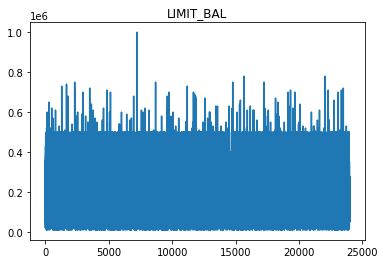

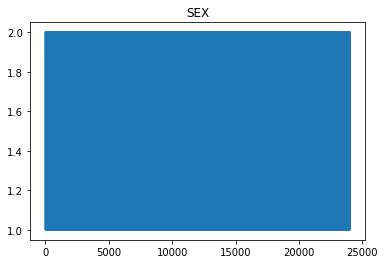

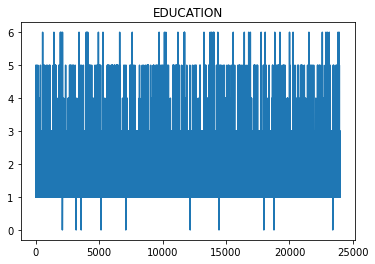

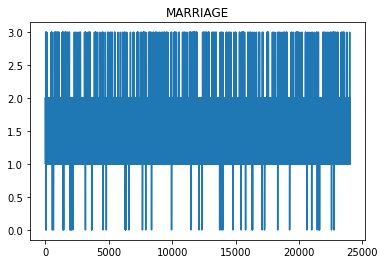

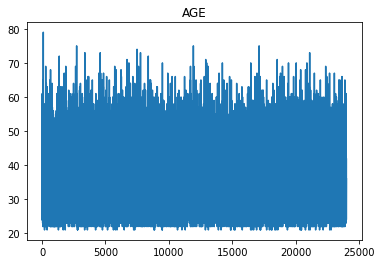

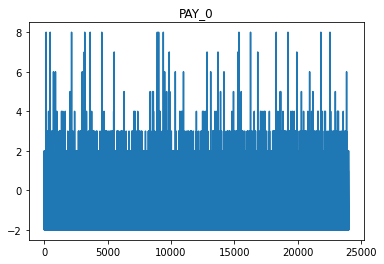

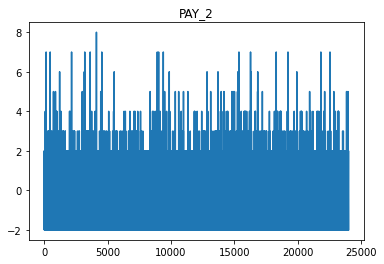

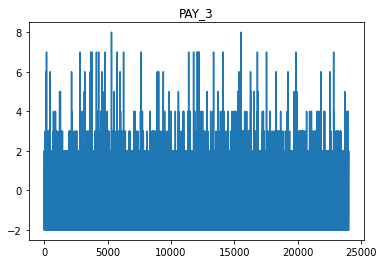

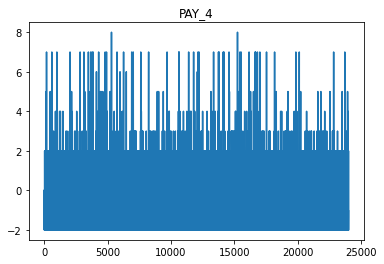

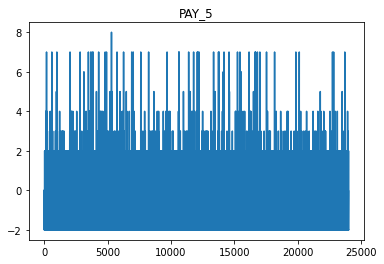

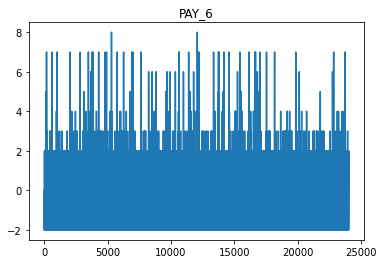

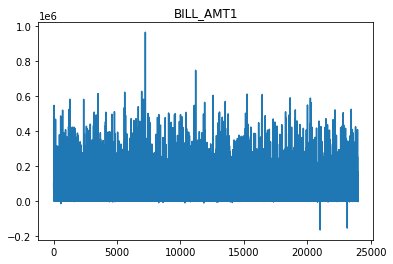

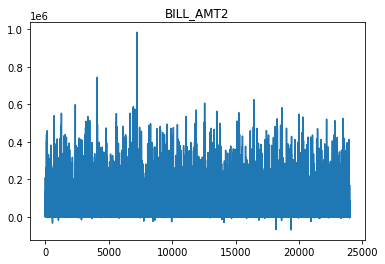

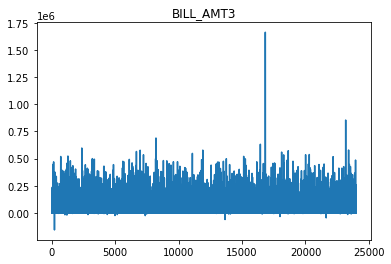

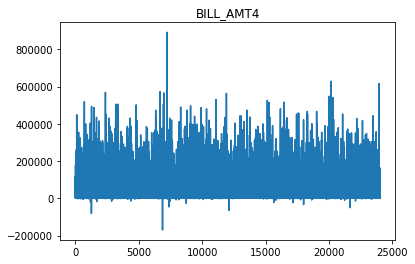

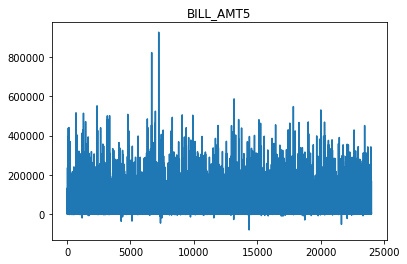

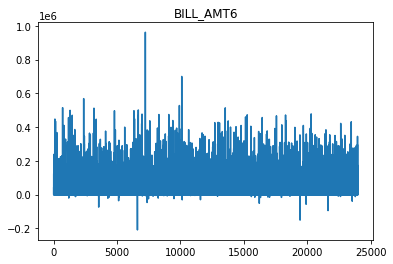

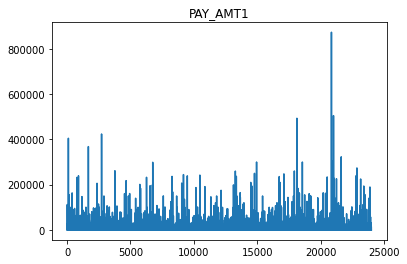

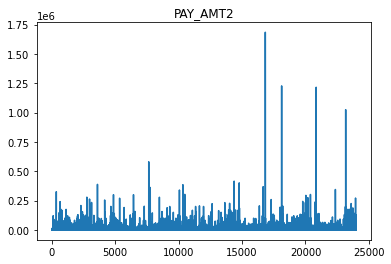

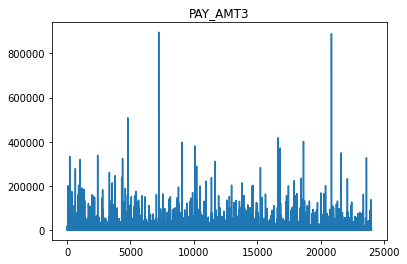

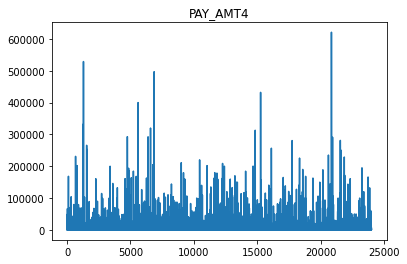

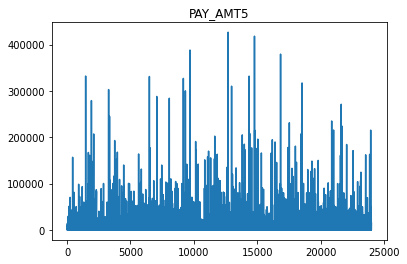

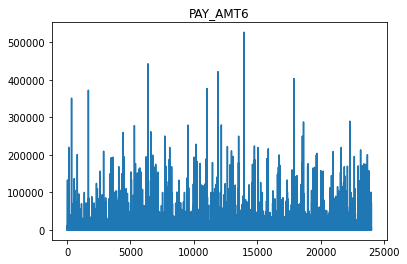

In [10]:
# column_names = DF.columns
# for col in column_names:
#     plot_dist(col)
for col in DF_train_X.columns:
    DF_train_X.loc[:,col].plot(subplots=True)
    plt.title(col)
    plt.show()

In [11]:
DF.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [12]:
sc = StandardScaler()
DF_train_X = sc.fit_transform(DF_train_X)

# DATASET READY

In [13]:

from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real,Integer

In [14]:
lgbm_model = lgbm.LGBMClassifier(boosting_type='gbdt',objective='binary')
paramsBayes = {
    "num_leaves": Integer(10,1000,prior='log-uniform'),
    'subsample': Real(0.1,1,prior='log-uniform'),
    'learning_rate': Real(1e-5,1,prior='log-uniform'),
    'min_split_gain':Real(0,1e-3),
    'colsample_bytree':Real(0.1,1)
}
resBayes = BayesSearchCV(lgbm_model,paramsBayes,n_iter=32,cv=5)

In [15]:
resBayesHist = resBayes.fit(DF_train_X,DF_train_Y)
#Took 161.7s

In [16]:
with open('LGBM_BayesSearch.pickle', 'wb') as f:
    pkl.dump(resBayesHist.best_estimator_, f, protocol=pkl.HIGHEST_PROTOCOL)

In [17]:
modelXGB = xgboost.XGBClassifier(booster='gbtree',use_label_encoder=False,eval_metric='logloss')
paramsXGB = {
    'learning_rate':[1e-5,1e-3],
    'max_depth':[1,2,5,7,10,],
    'n_estimators':[50,100,200,500]
}
resXGB = GridSearchCV(modelXGB,cv=5,param_grid=paramsXGB,n_jobs=1,scoring=['accuracy','recall','precision'],refit='recall',verbose=2)

In [18]:
r_hist = resXGB.fit(DF_train_X,DF_train_Y,verbose=1)
#373.9 secs

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] learning_rate=1e-05, max_depth=1, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=1e-05, max_depth=1, n_estimators=50, total=   1.4s
[CV] learning_rate=1e-05, max_depth=1, n_estimators=50 ...............
[CV]  learning_rate=1e-05, max_depth=1, n_estimators=50, total=   0.1s
[CV] learning_rate=1e-05, max_depth=1, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  learning_rate=1e-05, max_depth=1, n_estimators=50, total=   0.1s
[CV] learning_rate=1e-05, max_depth=1, n_estimators=50 ...............
[CV]  learning_rate=1e-05, max_depth=1, n_estimators=50, total=   0.1s
[CV] learning_rate=1e-05, max_depth=1, n_estimators=50 ...............
[CV]  learning_rate=1e-05, max_depth=1, n_estimators=50, total=   0.1s
[CV] learning_rate=1e-05, max_depth=1, n_estimators=100 ..............
[CV]  learning_rate=1e-05, max_depth=1, n_estimators=100, total=   0.2s
[CV] learning_rate=1e-05, max_depth=1, n_estimators=100 ..............
[CV]  learning_rate=1e-05, max_depth=1, n_estimators=100, total=   0.2s
[CV] learning_rate=1e-05, max_depth=1, n_estimators=100 ..............
[CV]  learning_rate=1e-05, max_depth=1, n_estimators=100, total=   0.2s
[CV] learning_rate=1e-05, max_depth=1, n_estimators=100 ..............
[CV]  learning_rate=1e-05, max_depth=1, n_estimators=100, total=   0.2s
[CV] learning_rate=1e-05, max_depth=1, n_estimators=100 ..............
[C

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.7min finished


In [19]:
with open('XGB_GridSearch.pickle', 'wb') as f:
    pkl.dump(r_hist.best_estimator_, f, protocol=pkl.HIGHEST_PROTOCOL)

In [20]:
modelXGB_Bayes = xgboost.XGBClassifier(booster='gbtree',use_label_encoder=False,eval_metric='logloss')
paramsXGB_Bayes = {
    'learning_rate':Real(1e-5,1e-1),
    'max_depth':Integer(1,100),
    'n_estimators':Integer(10,500)
}
resXGBBayes = BayesSearchCV(modelXGB_Bayes,paramsBayes,n_iter=32,cv=5)

In [21]:
resXGBBayes.fit(DF_train_X,DF_train_Y)

[11:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_split_gain", "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:06:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_split_gain", "num_leaves" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_split_gain", "num_leaves" } might not be used.

  This may not 

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster='gbtree',
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None,
                                      eval_metric='logloss', gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=N...
              search_spaces={'colsample_bytree': Real(low=0.1, high=1, prior='uniform', transform='identity'),
                             'learning_rate': Real(low=1e-05, high=1, prior='log-uniform', transform='identity'),
                             'min_split_gain': Re

In [22]:
with open('XGB_BayesSearch.pickle', 'wb') as f:
    pkl.dump(resXGBBayes.best_estimator_, f, protocol=pkl.HIGHEST_PROTOCOL)

# Read the models

In [23]:
with open('XGB_GridSearch.pickle','rb') as f:
    xgbFinalModel = pkl.load(f)

In [24]:
xgbFinalModel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1e-05, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [25]:
with open('LGBM_BayesSearch.pickle','rb') as f:
    lgbmFinalModel = pkl.load(f)

In [26]:
lgbmFinalModel

LGBMClassifier(learning_rate=0.025903790556118092, num_leaves=10,
               objective='binary')

In [27]:
with open('XGB_BayesSearch.pickle','rb') as f:
    xgbBayesFinalModel = pkl.load(f)

In [28]:
xgbBayesFinalModel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9953407506805197,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.00014957451246913733,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              min_split_gain=0.0008976141878608997, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_leaves=513, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.8090024927299336,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# TESTING

In [29]:
DF_test = pd.read_csv(r'data\UCI_Credit_Card_Test.csv',index_col=0).reset_index(drop=True)

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [31]:
DF_test_X = DF_test.loc[:,DF.columns[:-1]]
DF_test_Y = DF_test.loc[:,DF.columns[-1]]
DF_test_X = sc.transform(DF_test_X)

In [32]:
def evalMetrics(modelName,predArr,testArr):
    print('--'+modelName+'--')
    print('accuracy_score',accuracy_score(predArr,testArr))
    print('recall_score',recall_score(predArr,testArr))
    print('precision_score',precision_score(predArr,testArr))

In [33]:
#Basic DTC
modelSGD = SGDClassifier()
modelSGD.fit(DF_train_X,DF_train_Y)
DF_predDTC_Y = modelSGD.predict(DF_test_X)
evalMetrics('SGD',pd.Series(DF_predDTC_Y),DF_test_Y)

--SGD--
accuracy_score 0.808
recall_score 0.6493506493506493
precision_score 0.26656511805026656


In [34]:
xgbFinalModel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1e-05, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [35]:
#XGB
DF_predXGB_Y = xgbFinalModel.predict(DF_test_X)
evalMetrics('XGB-GridSearch-',DF_predXGB_Y,DF_test_Y)

--XGB-GridSearch---
accuracy_score 0.8051666666666667
recall_score 0.5906801007556675
precision_score 0.3571972581873572


In [36]:
DF_predXGB_Bayes_Y = xgbBayesFinalModel.predict(DF_test_X)
evalMetrics('XGB-BayesSearch-',DF_predXGB_Bayes_Y,DF_test_Y)

--XGB-BayesSearch---
accuracy_score 0.8215
recall_score 0.6748554913294798
precision_score 0.3556740289413557


In [37]:
lgbmFinalModel

LGBMClassifier(learning_rate=0.025903790556118092, num_leaves=10,
               objective='binary')

In [38]:
#LGM
DF_predLGBM_Y = lgbmFinalModel.predict(DF_test_X)
evalMetrics('LGBM-BayesSearch-',DF_predLGBM_Y,DF_test_Y)

--LGBM-BayesSearch---
accuracy_score 0.8206666666666667
recall_score 0.6755555555555556
precision_score 0.3472962680883473
